This notebook is meant to help recording and organizing the work toward a clean bias-variance curve

### Workflow

1. Simulation
2. Analyis
3. Observations
4. Debugging
5. Fixes and Parameter Tuning
6. Repeat


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from ring_attractor import RingAttractor

ImportError: attempted relative import with no known parent package

# Batch 0 

### 1. Simulation

>   "neurons_n": 256,  
    "simulation_time": 10000,  
    "iterations": 30,  
    "noise_levels": 30,  
    "noise_low": 0.0,  
    "noise_high": 3.0e-3,  
    "weights": [0.050, 0.100, 0.050, 0.250],  
    "fixed_points": [0, 1, 2, 4, 8, 16, 32]  



In [ ]:
df = pd.read_csv('backups/batch_0/means.csv', index_col=0)
df

### 2. Analysis

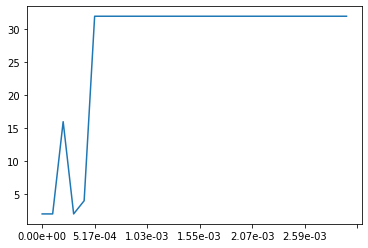

In [10]:
df.idxmin().plot()

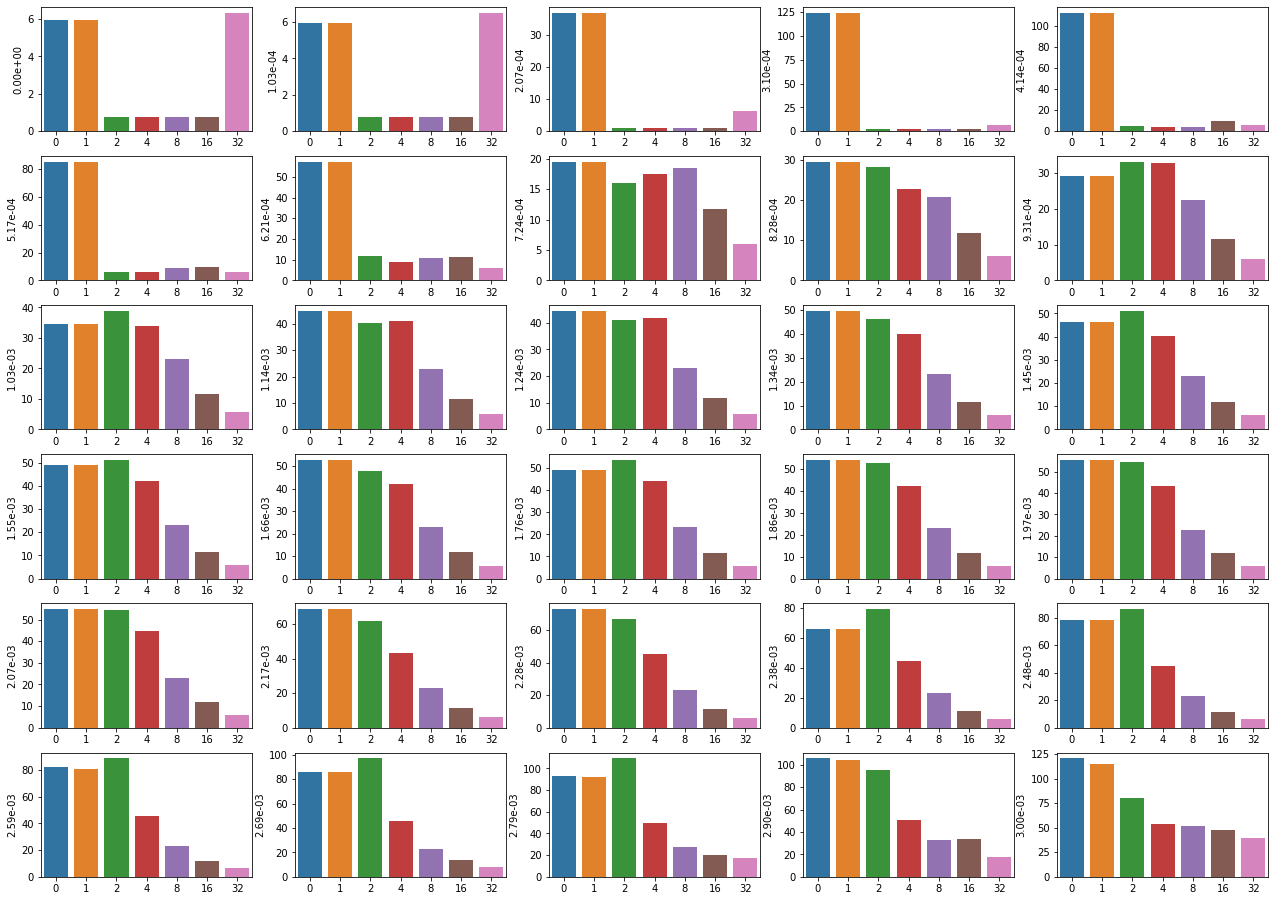

In [40]:
_, axes = plt.subplots(6, 5, figsize=(22, 16))
c, r = 0, 0
for col in df.columns:
    sns.barplot(x=df.index, y=col, data=df, ax=axes[c, r])
    
    r += 1
    if r > 4:
        c+=1
        r=0

### 3. Observations

- a. after 5e-4 noise the the minimum error is always achieved by 32 fixed points
- b. before that we have very high values with 0 and 1 fixed points, probably a bug
- c. constant error at 32 fixed points
- d. after 8e-4 the error behaves almost exactly as predicted

### 4. Debugging

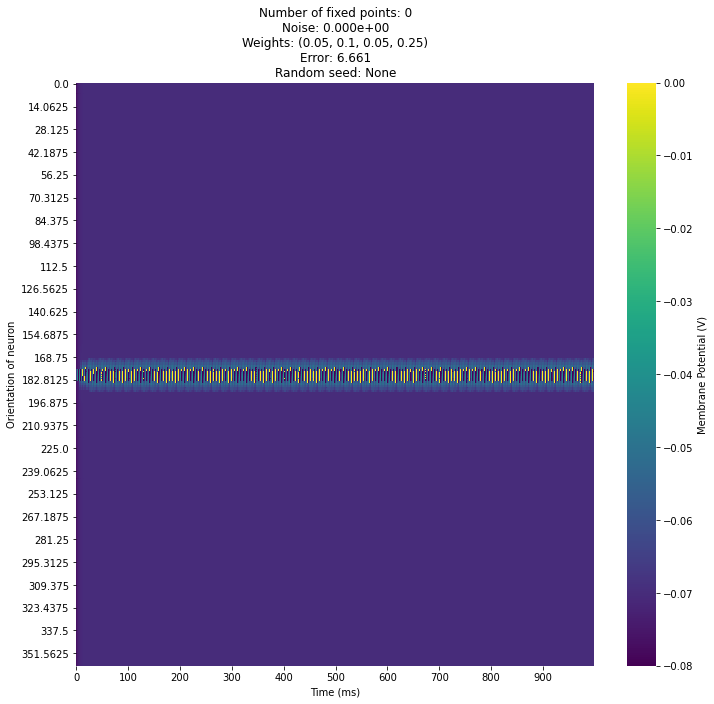

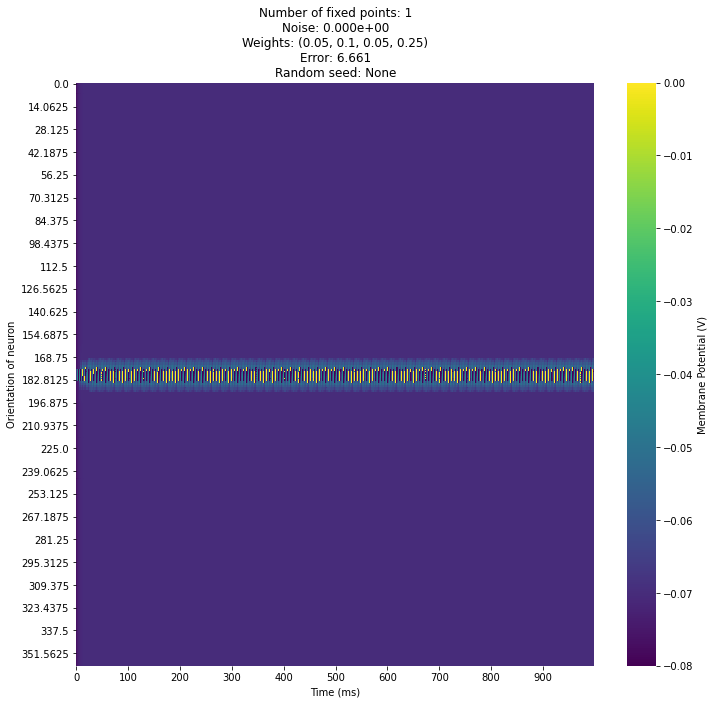

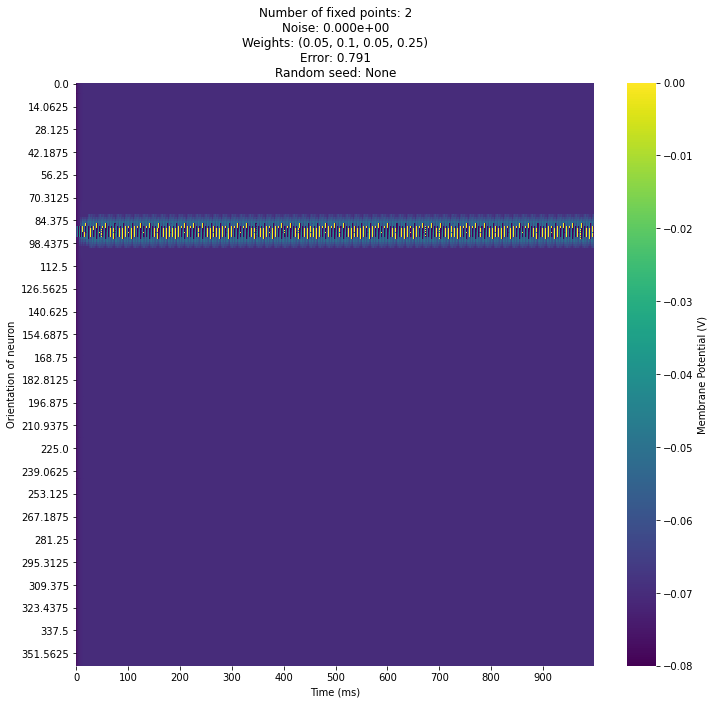

In [13]:
# b. before that we have very high values with 0 and 1 fixed points, probably a bug
# I'm not using a random seed since there is no randomness

ring = RingAttractor(n=256, noise=0, fixed_points_number=0, plot=True)
error_0 = ring.simulate()
ring = RingAttractor(n=256, noise=0, fixed_points_number=1, plot=True)
error_1 = ring.simulate()
ring = RingAttractor(n=256, noise=0, fixed_points_number=2, plot=True)
error_2 = ring.simulate()

**Starting in different positions causes sistematically different errors.**

To test this, I'll simulate the ring with 0 fp but starting at the same location of the ring with 2 fp

Starting point with 2 fixed points: 65
Starting point with 0 fixed points: 128


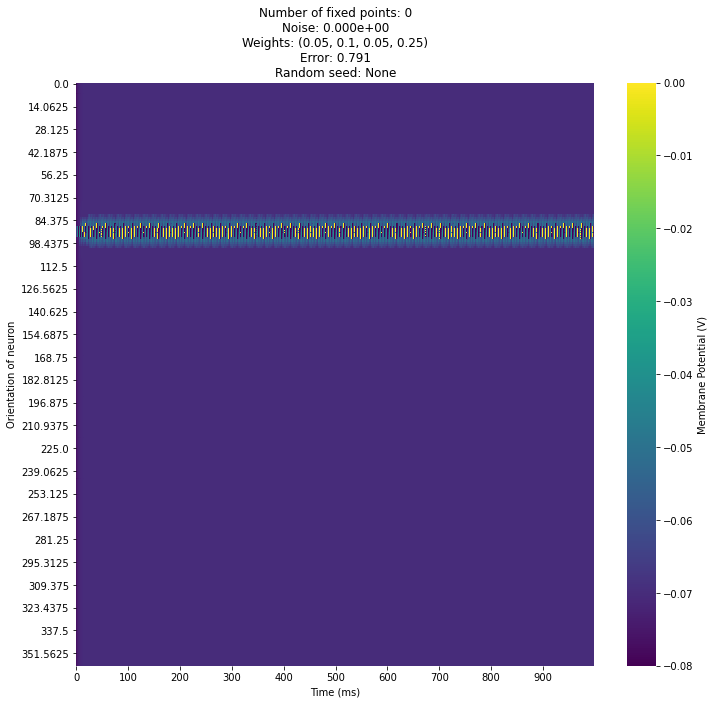

The hypotesis is validated


In [12]:
ring = RingAttractor(n=256, noise=0, fixed_points_number=2, plot=True)
print("Starting point with 2 fixed points:", ring.mid_point)

ring = RingAttractor(n=256, noise=0, fixed_points_number=0, plot=True)
print("Starting point with 0 fixed points:", ring.mid_point)

ring.mid_point = 65
error_0_at_2 = ring.simulate()

if error_0_at_2 == error_2: 
    print("The hypotesis is validated")

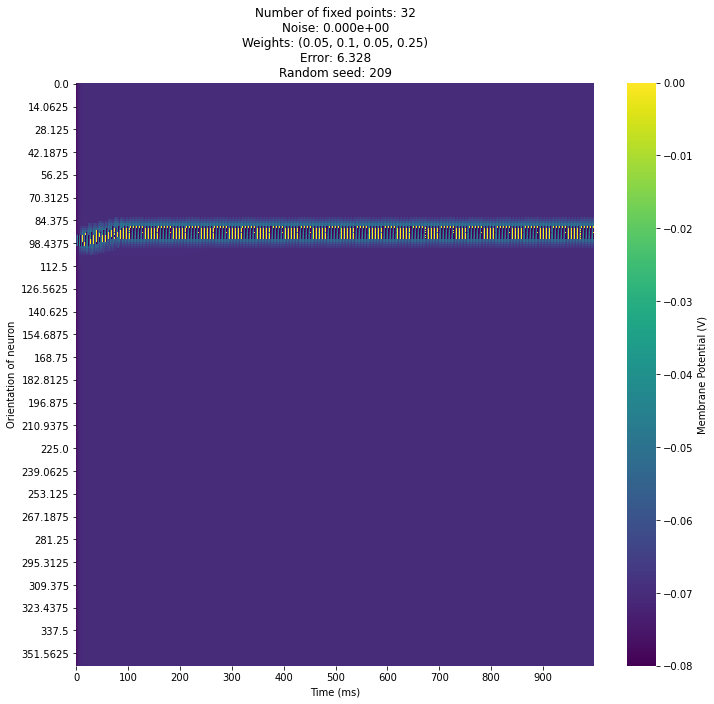

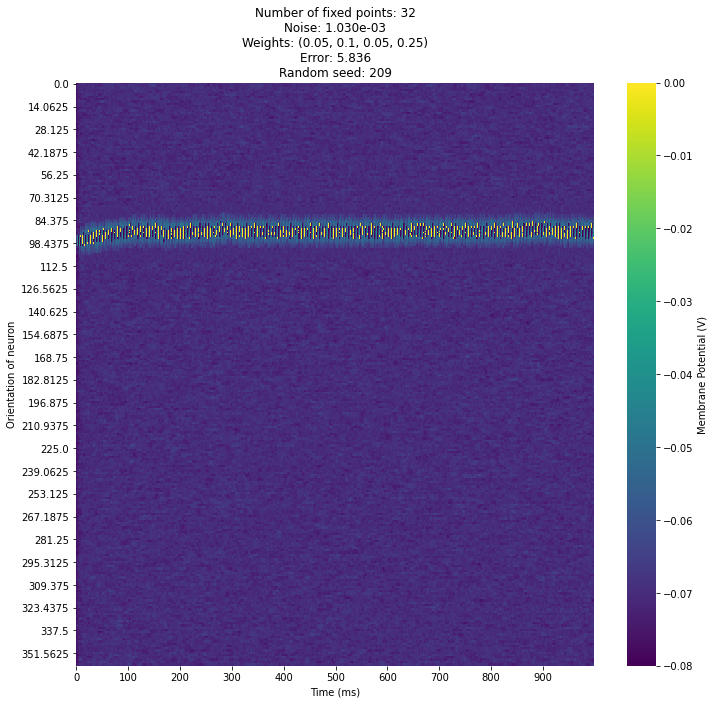

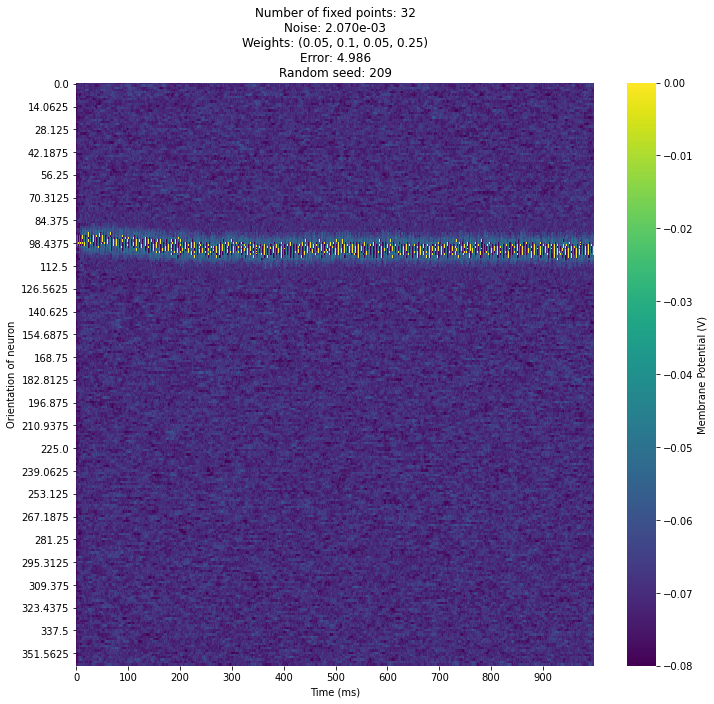

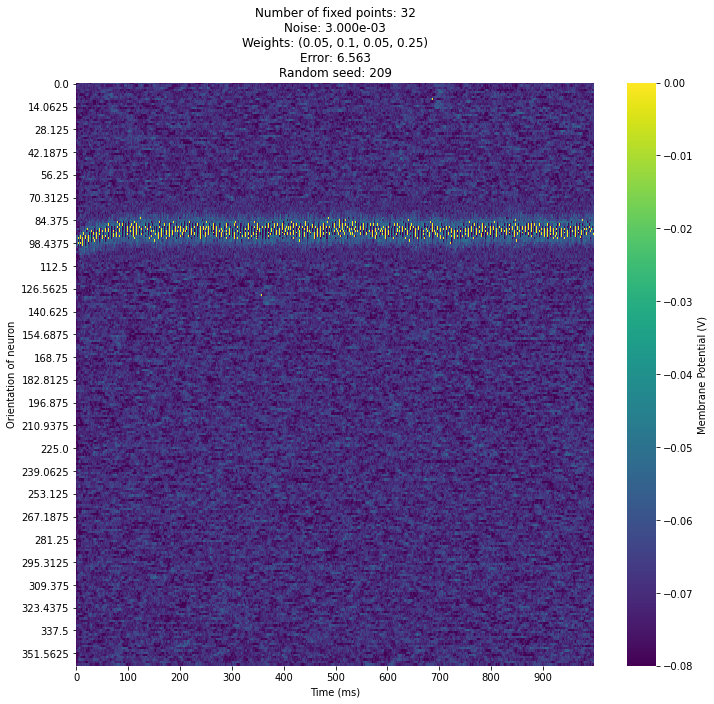

In [22]:
#  c. constant error at 32 fixed points
seed = 209
ring = RingAttractor(n=256, noise=0, fixed_points_number=32, plot=True, random_seed=seed)
error_32_noise_0 = ring.simulate()
ring = RingAttractor(n=256, noise=1.03e-3, fixed_points_number=32, plot=True, random_seed=seed)
error_32_noise_1 = ring.simulate()
ring = RingAttractor(n=256, noise=2.07e-3, fixed_points_number=32, plot=True, random_seed=seed)
error_32_noise_2 = ring.simulate()
ring = RingAttractor(n=256, noise=3.00e-3, fixed_points_number=32, plot=True, random_seed=seed)
error_32_noise_3 = ring.simulate()

Apparently, since there are so many fixed points, even without noise the bump is captured by the nearest fixed points, causing an error. This could be realistic, so there is no need to fix for now.

At high levels of noise, we sometimes see a higher errors but still they're still low, and probably caused just from noise

### 5. Fixes and Parameter Tuning

    a. after 5e-4 noise the the minimum error is always achieved by 32 fixed points
    b. before that we have very high values with 0 and 1 fixed points, probably a bug
    c. constant error at 32 fixed points
    d. after 8e-4 the error behaves almost exactly as predicted
    
- Observations **a.** and **d.** tells us that we should focus on what is happening below 8e-4 noise, so next simulations should be on that range
- **b.** tells us that changing starting point is not a good idea, and we should instead pick the fixed point in relation to the same mid point every time
- **c.** tells us that 32 fixed points are the maximum for 256 neurons 


### 6. Repeat

The next simulation will focus on a smaller range of error, and won't take the mean between the trials.

After that, we'll fix the starting point